**br_stat_profiler - Help Text**

In [1]:

import os

from user_args import load_parser, check_args
from br_stat_profiler import preprocess_recal_table, profile_rt, save_profile

cmd = f"--help"

parser = load_parser()
args = parser.parse_args(cmd.split())
adict = check_args(args) 
# [print(key,":",val) for key,val in adict.items()] 

rt2_pre_stat_df = preprocess_recal_table(adict)
profile = profile_rt(rt2_pre_stat_df, adict)
save_profile(profile, adict)

profile

usage: ipykernel_launcher.py [-h] [-i <GATKReport [stdin]>]
                             [-o <*.csv [stdout]>] [-a <*.csv>]
                             [-mq <int min=1 [1]>]
                             [-e <int between 1 and 10 [4]>]
                             [-sb <int between 1 and 10 [4]>]
                             [-cb <int between 1 and 15 [10]>]
                             [-mic <int [1]>] [-mxc <int [150]>]
                             [-nan <float [0]>] [-kN] [-nZ]
                             [-ct <choices [cntxt]>] [-co <float [2]>] [-nW]
                             [-wN <int [2]>] [-wRY <int [3]>] [-nL]

br_stat_profiler - Converts GATK (V4.4.0.0) BaseRecalibrator stat report into
profiles that can be compared/clustered downstream. It generates a separate
profile for each ReadGroup in the stat report and tabulates them for easy
analysis. The profiles can be saved in a CSV format or streamed as output for
further processing.

options:
  -h, --help            show thi

SystemExit: 0

/home/ido/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


**br_stat_profiling**<br>
Setting: qerr_cutoff  is turned off, 2 wobble_positions

In [4]:

import os

from user_args import load_parser, check_args
from br_stat_profiler import preprocess_recal_table, profile_rt, save_profile

RECAL_TABLE_DIR = "./data/test_bqsr/"
REC_TAB_FULL_PATH = \
    RECAL_TABLE_DIR + "pre-LUAD-02_all_chrs_wo_Y_MT.bam.context4.recal_data.table"
OUTFILE_DIR = "./outfiles/"
OUTFILE = OUTFILE_DIR + "first_profile_num.csv"

if os.path.exists(OUTFILE):
    os.remove(OUTFILE)

# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} -co -20"
# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} -nW"
cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} --qerr_cutoff -20 --log_file logloglog"
# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} --qerr_cutoff -20 --keep_nan_value"

parser = load_parser()
args = parser.parse_args(cmd.split())
adict = check_args(args) 
# [print(key,":",val) for key,val in adict.items()] 

rt2_pre_stat_df = preprocess_recal_table(adict)
profile = profile_rt(rt2_pre_stat_df, adict)
save_profile(profile, adict)

profile

,HVWKMCCXY
AAAA:0:Context,-1.323962
AAAA:1:Context,-3.447121
AAAA:2:Context,-1.436358
AAAA:3:Context,1.231724
AAAC:0:Context,-1.250793
...,...
YYYN:3:Context,1.358640
YYYT:0:Context,-1.367476
YYYT:1:Context,-1.147437
YYYT:2:Context,-0.844008


#### **Step 1:** Binning Quality Scores into 4 bins (default value of scr_bin_count argument)

In [4]:
rt2_pre_stat_df

,ReadGroup,QualityScore,CovariateValue,CovariateName,EventType,EmpiricalQuality,Observations,Errors,RG_ScoreBin
0,HVWKMCCXY,6,-10,Cycle,M,8.0,4373,648.0,0
1,HVWKMCCXY,6,-11,Cycle,M,8.0,4399,665.0,0
2,HVWKMCCXY,6,-12,Cycle,M,7.0,13550,2420.0,0
3,HVWKMCCXY,6,-13,Cycle,M,7.0,14876,2776.0,0
4,HVWKMCCXY,6,-14,Cycle,M,8.0,4571,679.0,0
...,...,...,...,...,...,...,...,...,...
13164,HVWKMCCXY,32,TTAA,Context,M,41.0,171284812,12580.0,3
13165,HVWKMCCXY,32,TTAG,Context,M,37.0,97670908,18943.0,3
13166,HVWKMCCXY,32,TTCT,Context,M,39.0,203890620,26064.0,3
13167,HVWKMCCXY,32,TTTA,Context,M,38.0,206776269,32371.0,3


#### **Step 2:** 
1) Calculating the Qerror (Empyrical Quality - Machine Quality) 
2) Calculating the Qerror of context with wobble positions
3) Completing the missing values as None or zero

In [5]:
from br_stat_profiler import prepare_stat_df
from constants import RC_TAB2
cntxt_rt2_stat_df = prepare_stat_df(rt2_pre_stat_df, RC_TAB2.CNTXT_COV, adict)
cntxt_rt2_stat_df

,ReadGroup,RG_ScoreBin,Context,BinAvgQltyPval,BinAvgQltyScore,BinSumObs,BinSumObsErrs,BinAvgEmpQlty,BinAvgQltyErr,ID
0,HVWKMCCXY,0,AAAA,0.073150,11.357874,17708874,1912799.0,9.665216,-1.692658,AAAA:0:Context
1,HVWKMCCXY,1,AAAA,0.026477,15.771375,1889386,277449.0,8.331375,-7.440000,AAAA:1:Context
2,HVWKMCCXY,2,AAAA,0.004275,23.690297,49519043,335300.0,21.693387,-1.996910,AAAA:2:Context
3,HVWKMCCXY,3,AAAA,0.000786,31.043751,1068347230,252223.0,36.269277,5.225527,AAAA:3:Context
4,HVWKMCCXY,0,AAAC,0.174593,7.579741,7894543,1944518.0,6.085150,-1.494591,AAAC:0:Context
...,...,...,...,...,...,...,...,...,...,...
9435,HVWKMCCXY,3,YYYN,0.000925,30.337221,11008146234,2825423.0,35.906307,5.569086,YYYN:3:Context
9436,HVWKMCCXY,0,YYYT,0.113907,9.434485,45656849,7890458.0,7.624037,-1.810447,YYYT:0:Context
9437,HVWKMCCXY,1,YYYT,0.033251,14.781940,64955201,2856937.0,13.567133,-1.214807,YYYT:1:Context
9438,HVWKMCCXY,2,YYYT,0.004223,23.744279,202187881,934696.0,23.350847,-0.393432,YYYT:2:Context


#### QErrors Distribution

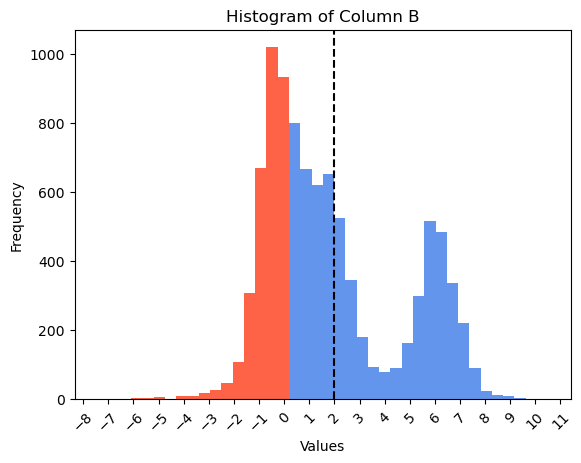

In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from constants import RT2_STAT
# Assuming you have a dataframe called 'df' with columns 'A', 'B', and 'C'
cutoff = 2
bins_count = 40
stat_df = cntxt_rt2_stat_df
data = stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL]

# Plotting the histogram
counts, bins, patches = plt.hist(data, bins=bins_count)  # Adjust the number of bins as needed

for i in range(len(bins)-1):
    if bins[i] <= 0:
        patches[i].set_facecolor('tomato')
    else:
        patches[i].set_facecolor('cornflowerblue')

plt.axvline(x=cutoff, color='black', linestyle='--',linewidth=1.5)
# plt.axvline(x=-cutoff, color='black', linestyle='--')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column B')

minx = math.floor(stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
maxx =  math.ceil(stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
xticks = np.arange(minx, maxx+1, 1)

plt.xticks(xticks, rotation=45)
# Display the histogram
plt.show()


#### QErrors Distribution - negative over positive values 

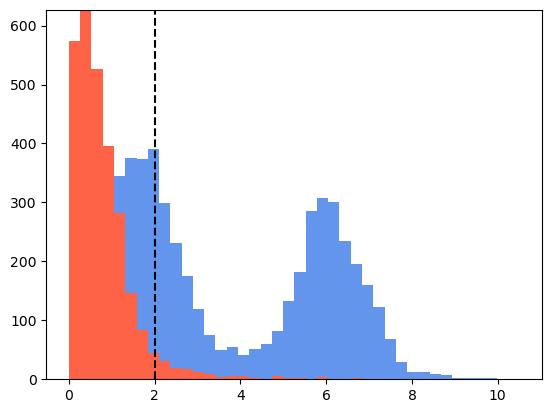

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from constants import RT2_STAT
# Assuming you have a dataframe called 'df' with columns 'A', 'B', and 'C'
cutoff = 2
bins_count = 80
data = cntxt_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL]
# Generate example data
# data = np.random.normal(0, 1, 1000)

# Create the histogram for the positive bins
counts_pos, bins_pos, _ = plt.hist(data[data >= 0], bins=round(bins_count/2), color='cornflowerblue')

# Extract the negative bins and calculate the positive mirror image
negative_data = data[data < 0]
mirror_data = -negative_data

# Create the histogram for the mirror image of the negative bins
counts_mirror, bins_mirror, _ = plt.hist(mirror_data, bins=bins_pos, color='tomato')

plt.axvline(x=cutoff, color='black', linestyle='--', linewidth=1.5)

# Find the maximum count between positive and mirrored negative bins
max_count = max(np.max(counts_pos), np.max(counts_mirror))

# Set the y-axis limit to accommodate both positive and mirrored negative bins
plt.ylim(0, max_count)

# Display the plot
plt.show()


In [8]:
na_count = cntxt_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].isna().sum()
total = cntxt_rt2_stat_df.shape[0]
na_ratio = na_count/total
print(f"na couunt= {na_count}, total= {total}, na_ratio= {na_ratio}")
# NA are removed later in the profile extraction stage 


na couunt= 49, total= 9440, na_ratio= 0.005190677966101695


#### QError distribution by Score bins (covariate = Context)

/tmp/ipykernel_1926243/2226724427.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])


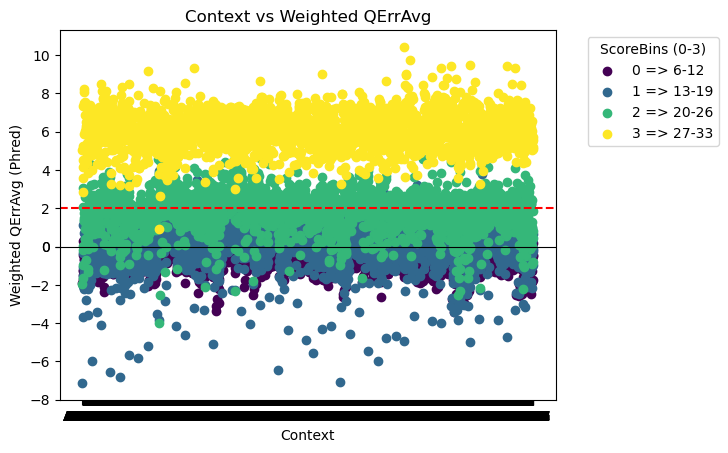

In [9]:
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from constants import RC_TAB2,RT2_STAT, CNTXT_RT2, RANGES
from user_args import UARGS
# draw a dot chart using matplotlib

def score_qntl_ranges(rt2_pre_stat_df):
    df =  rt2_pre_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL)[RC_TAB2.QLTY_SCORE_COL].apply(lambda x: (min(x), max(x))).reset_index()
    return df.rename(columns={RC_TAB2.QLTY_SCORE_COL: RANGES.SCORE_BIN})

def jitter_list(lst, mean=0, std=0.1):
    jittered_list = np.array(lst) + np.random.normal(mean, std, len(lst))
    return jittered_list.tolist()


temp_stat_df = cntxt_rt2_stat_df
temp_stat_df = temp_stat_df.sort_values(by=[RC_TAB2.CNTXT_COV])
y_start = math.floor(temp_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
y_end = math.ceil(temp_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
jitter_factor = (y_end - y_start) /100

ranges = score_qntl_ranges(rt2_pre_stat_df)[RANGES.SCORE_BIN].unique()
# cmap = cm.get_cmap('viridis', len(cntxt_rt2_stat_df[RC_TAB2.RG_SCORE_BIN_COL].unique()))
cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])
# create the scatter plot
fig, ax = plt.subplots()
for i, group in temp_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL):
    jittered_y = jitter_list(group[RT2_STAT.BIN_AVG_QLTY_ERR_COL], 0 , jitter_factor)
    # ax.scatter(group[CNTXT_RT2.CNTXT_COL], group[RT2_STAT.QLTY_ERR_W_AVG_COL], 
    ax.scatter(group[CNTXT_RT2.CNTXT_COL], jittered_y, 
            #    c=[cmap(i)], label=i)
        c=[cmap(i)], label=f'{i} => {ranges[i][0]}-{ranges[i][1]}')

ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=2, color='red', linestyle='--', linewidth=1.5)
ax.set_title('Context vs Weighted QErrAvg')
ax.set_xlabel('Context')
ax.set_ylabel('Weighted QErrAvg (Phred)')
ax.legend(title="ScoreBins (0-3)", bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.xticks(range(cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].min(), cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].max()+1,2))

import numpy as np
# Y_TICKS_COUNT = 5
# yticks = np.arange(y_start, y_end, (y_end - y_start) / (Y_TICKS_COUNT))
YTICK_STEP = 2
yticks = np.arange(y_start, y_end, YTICK_STEP)
yticks = np.append(yticks, 0)

plt.yticks(yticks)
# display the chart
plt.show()


In [10]:
from br_stat_profiler import prepare_stat_df
from constants import RC_TAB2
mode = RC_TAB2.CYC_COV
cyc_rt2_stat_df = prepare_stat_df(rt2_pre_stat_df, mode, adict)
cyc_rt2_stat_df

,ReadGroup,RG_ScoreBin,CycleBin,BinAvgQltyPval,BinAvgQltyScore,BinSumObs,BinSumObsErrs,BinAvgEmpQlty,BinAvgQltyErr,ID
0,HVWKMCCXY,0,-10,0.099512,10.021234,169624160,19904213.0,9.305427,-0.715807,-10:0:CycleBin
1,HVWKMCCXY,1,-10,0.029457,15.308155,154079085,4691541.0,15.164282,-0.143873,-10:1:CycleBin
2,HVWKMCCXY,2,-10,0.004135,23.835704,861841998,1764885.0,26.887112,3.051408,-10:2:CycleBin
3,HVWKMCCXY,3,-10,0.000954,30.204899,2474676101,742333.0,35.229196,5.024297,-10:3:CycleBin
4,HVWKMCCXY,0,-1,0.110327,9.573186,38594491,4760277.0,9.088931,-0.484255,-1:0:CycleBin
...,...,...,...,...,...,...,...,...,...,...
75,HVWKMCCXY,3,8,0.000842,30.746502,3488209678,798154.0,36.405159,5.658657,8:3:CycleBin
76,HVWKMCCXY,0,9,0.108521,9.644858,76817863,9324672.0,9.158287,-0.486571,9:0:CycleBin
77,HVWKMCCXY,1,9,0.028553,15.443480,61144482,1707247.0,15.540609,0.097129,9:1:CycleBin
78,HVWKMCCXY,2,9,0.004706,23.273157,245683961,897354.0,24.374130,1.100973,9:2:CycleBin


**QError Weighted Avg vs Read Cycle**

/tmp/ipykernel_1926243/650287510.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])


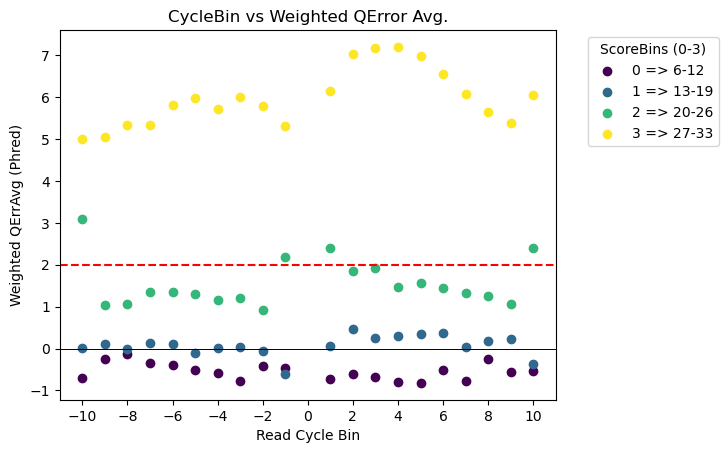

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from constants import RC_TAB2,RT2_STAT, CYC_RT2, RANGES
import matplotlib.colors as mcolors
from user_args import UARGS


def score_qntl_ranges(rt2_pre_stat_df):
    df =  rt2_pre_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL)[RC_TAB2.QLTY_SCORE_COL].apply(lambda x: (min(x), max(x))).reset_index()
    return df.rename(columns={RC_TAB2.QLTY_SCORE_COL: RANGES.SCORE_BIN})

def jitter_list(lst, mean=0, std=0.1):
    jittered_list = np.array(lst) + np.random.normal(mean, std, len(lst))
    return jittered_list.tolist()

y_start = math.floor(cyc_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
y_end   = math.ceil(cyc_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
jitter_factor = (y_end - y_start) /100

ranges = score_qntl_ranges(rt2_pre_stat_df)[RANGES.SCORE_BIN].unique()
# cmap = cm.get_cmap('viridis', len(cyc_rt2_stat_df[RC_TAB2.RG_SCORE_BIN_COL].unique())+2)
cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])

fig, ax = plt.subplots()
for i, group in cyc_rt2_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL):
    # print(i, cmap(i))
    jittered_y = jitter_list(group[RT2_STAT.BIN_AVG_QLTY_ERR_COL], 0 , jitter_factor)
    ax.scatter(group[CYC_RT2.CYC_BIN_COL], jittered_y,
        c=[cmap(i)], label=f'{i} => {ranges[i][0]}-{ranges[i][1]}')

ax.axhline(y=0, color='black', linewidth=.7)
ax.axhline(y=2, color='red', linestyle='--', linewidth=1.5)
ax.set_title('CycleBin vs Weighted QError Avg.')
ax.set_xlabel('Read Cycle Bin')
ax.set_ylabel('Weighted QErrAvg (Phred)')
ax.legend(title="ScoreBins (0-3)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(range(cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].min(), cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].max()+1,2))
# plt.yticks(range(round(cyc_rt2_stat_df[RT2_STAT.QLTY_ERR_AVG_COL].min()), round(cyc_rt2_stat_df[RT2_STAT.QLTY_ERR_AVG_COL].max())+1))
# display the chart
plt.show()
